In [1]:
import os
import sys
import math
import copy
import cmath

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
import libra_py.workflows.nbra.step4 as step4
from libra_py import ft


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  # Remove the CWD from sys.path while we load stuff.
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  # Remove the CWD from sys.path while we load stuff.
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_po

Continuous Fourier Transform
  f(w) = Integral ( f(t) * exp(-2*pi*i*w*t) * dt ) =
 
     N-1
  = sum ( f(t_n) * exp(-2*pi*i*w*t_n)) * dt =   | t_n = dt * n | =
     n=0

          N-1
  = dt * sum ( tHvib[n] * exp(-2*pi*w*dt*n)  )
         n=0
          
          
w_k =  k /(dx * N)
k spacing is 1/(dx*N)

In [4]:
nsteps = 200

# Populate Hvib - this is our model
tHvib = CMATRIX(nsteps, 1)
wHvib = CMATRIX(nsteps, 1)
time = []
Horig = []

dt = 41.0 # a.u.
w0 = 3000.0 / units.au2wavn # a.u. 

for i in xrange(nsteps):    
    t = i * dt
    time.append(t)
    hi = 1.0 + 0.5*math.sin(w0*t)*(1.0+0.0j) + 0.25*math.sin(2*w0*t)*(1.0+0.0j) - 0.25*math.sin(5*w0*t)*(1.0+0.0j)
    tHvib.set(i, 0, hi)
    Horig.append(hi)
    
    
tmin = 0.0
wmin = 0.0
#W, C, S = ft.py_cft(tHvib, dt)  # wHvib, tmin, wmin,
cft(tHvib, wHvib, tmin, dt)  # 

dw = 1.0/(dt*nsteps)
w, I = [], []
for i in xrange(nsteps):
    w.append(i*dw)
    c = wHvib.get(i,0)
    I.append( (c * c.conjugate()).real )

Inverse Continuous Fourier Transform

  f(t_n) = Integral ( f(w) * exp(2*pi*i*w*t) * dw ) =

     N-1
  = sum ( f(k) * exp(2*pi*i* k * dw * t_n)) * dw 
    k=0
                
w_k = k/L = k / (N*dt)  

In [5]:
def reconstructH(wHvib, t, dt):
    res = 0.0+0.0j
    N = wHvib.num_of_rows
    dw = 1.0/(N*dt)
    
    for k in xrange(N):
        res = res + wHvib.get(k,0)*cmath.exp(2.0j*math.pi*k*dw*t)
    res = res * dw
    return res
    
Hrec = []   
time2 = []
for i in xrange(2*nsteps):
    t = i * dt
    time2.append(t)
    Hrec.append(reconstructH(wHvib, t, dt).real)

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


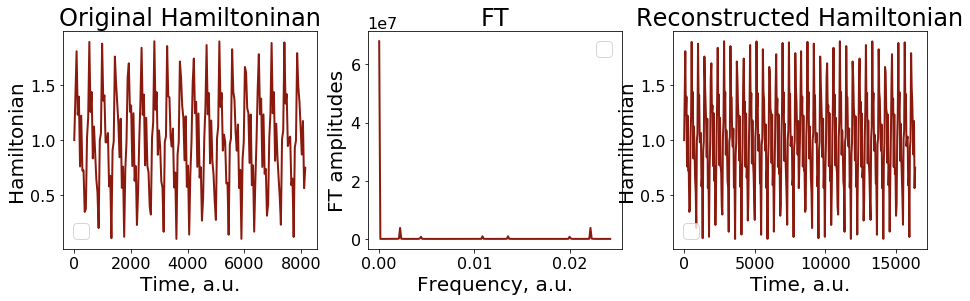

In [6]:
plt.figure(1, figsize=(16, 4)) # dpi=300, frameon=False)

plt.subplot(1,3,1)
plt.title('Original Hamiltoninan')
plt.xlabel('Time, a.u.')
plt.ylabel('Hamiltonian')
plt.plot(time, Horig, label='', linewidth=2, color = colors["11"]) 
plt.legend()


plt.subplot(1,3,2)
plt.title('FT')
plt.xlabel('Frequency, a.u.')
plt.ylabel('FT amplitudes')
plt.plot(w, I, label='', linewidth=2, color = colors["11"]) 
plt.legend()

plt.subplot(1,3,3)
plt.title('Reconstructed Hamiltonian')
plt.xlabel('Time, a.u.')
plt.ylabel('Hamiltonian')
plt.plot(time2, Hrec, label='', linewidth=2, color = colors["11"]) 
plt.legend()